In [1]:
import tweepy
import time
import csv
import pandas as pd


consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [10]:
limit = 5000
language = 'en' 
keywords = '#Commonwealthgames or commonwealth games'
startDate = "2022-07-29"
endDate = "2022-07-31"
place = "United Kingdom"


# Passing the parameters into the Cursor constructor method
public_tweets = tweepy.Cursor( api.search,
                                q= keywords,
                                result_type='recent',
                                since = startDate,
                                until = endDate,
                                count=100,
                                include_entities=True,
                                lang=language,
                                tweet_mode="extended",
                                encoding='utf-8-sig').items(limit)

In [11]:
tweet_id_list = []
tweet_text_list = []
tweet_location_list = []
user_screen_name_list = []
tweet_created_list = []
tweet_contributors_list = []
tweet_retweet_count_list = []
tweet_source_list = []
tweet_username_list = []


# Iterating through the results to extract the results
for tweet in public_tweets:
    tweet_id_list.append(tweet.id)
    tweet_text_list.append(tweet.full_text)
    tweet_location_list.append(tweet.user.location)
    user_screen_name_list.append(tweet.user.screen_name)
    tweet_source_list.append(tweet.source)
    tweet_created_list.append(tweet.created_at)
    tweet_contributors_list.append(tweet.id_str)
    tweet_retweet_count_list.append(tweet.retweet_count)
    tweet_username_list.append(tweet.user.name)

# Creating a Pandas dataframe to organize the data into a table
df = pd.DataFrame({
    'tweet_id': tweet_id_list,
    'tweet_text': tweet_text_list,
    'tweet_location': tweet_location_list,
    'user_screen': user_screen_name_list,
    'tweet_source': tweet_source_list,
    'tweet_created': tweet_created_list,
    'tweet_contributors': tweet_contributors_list,
    'tweet_retweet_count': tweet_retweet_count_list,
    'tweet_username': tweet_username_list})

In [12]:
def cleanUpTweet(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

In [13]:
df.to_csv('CW.csv', sep=',', index=False, encoding='utf-8-sig')

# Saving the file to Google drive

file_name = "CW.csv"

In [14]:
data =pd.read_csv("CW.csv")

In [15]:
data.shape

(61, 9)

In [17]:
data.head(10)

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username
0,1553523551029919746,RT @birminghamcg22: Don't miss any of the acti...,NaN,DiChristine,Twitter for iPhone,2022-07-30 23:30:52,1553523551029919746,12,anodyne
1,1553510680342446080,But we haven't heard much booing during the Co...,UK,me_abandon,Twitter Web App,2022-07-30 22:39:43,1553510680342446080,0,AbandonMe 🏳️‍🌈 ✡️
2,1553506638073585664,I haven't heard any booing or jeering of the N...,UK,me_abandon,Twitter Web App,2022-07-30 22:23:39,1553506638073585664,0,AbandonMe 🏳️‍🌈 ✡️
3,1553504544671285250,RT @birminghamcg22: Don't miss any of the acti...,United Kingdom,DCMS,Twitter Web App,2022-07-30 22:15:20,1553504544671285250,12,DCMS
4,1553499934007214083,RT @birminghamcg22: Don't miss any of the acti...,London,ACPSEMdance,Twitter for Android,2022-07-30 21:57:01,1553499934007214083,12,ACPSEMdance
5,1553498774072328193,RT @birminghamcg22: Don't miss any of the acti...,NaN,MillerOval,Twitter Web App,2022-07-30 21:52:25,1553498774072328193,12,Oval Miller
6,1553498677490044928,RT @birminghamcg22: Don't miss any of the acti...,"Calgary, Alberta",johangreg,Twitter for iPhone,2022-07-30 21:52:01,1553498677490044928,12,Грег Йохансен 🌻🇺🇦🇨🇦🏳️‍🌈🇵🇸🎾
7,1553496269095682050,RT @birminghamcg22: Don't miss any of the acti...,"London, UK",thecgf,Twitter Web App,2022-07-30 21:42:27,1553496269095682050,12,Commonwealth Sport
8,1553484617239257088,#CommonwealthGames \n\nBindyarani confirms Ind...,New Delhi,IExpressSports,Twitter Web App,2022-07-30 20:56:09,1553484617239257088,0,Express Sports
9,1553483774851178496,RT @birminghamcg22: Don't miss any of the acti...,"Birmingham, England",JeevanSChagger,Twitter Web App,2022-07-30 20:52:48,1553483774851178496,12,Mr C - Evolve


In [18]:
import re

In [19]:
#clean tweet and added column for clean tweet
def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

data["clean"] = data["tweet_text"].map(lambda x: cleaner(x))

In [20]:
data.head()

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username,clean
0,1553523551029919746,RT @birminghamcg22: Don't miss any of the acti...,NaN,DiChristine,Twitter for iPhone,2022-07-30 23:30:52,1553523551029919746,12,anodyne,Don't miss any of the action👀 \n\nDownload our...
1,1553510680342446080,But we haven't heard much booing during the Co...,UK,me_abandon,Twitter Web App,2022-07-30 22:39:43,1553510680342446080,0,AbandonMe 🏳️‍🌈 ✡️,But we haven't heard much booing during the Co...
2,1553506638073585664,I haven't heard any booing or jeering of the N...,UK,me_abandon,Twitter Web App,2022-07-30 22:23:39,1553506638073585664,0,AbandonMe 🏳️‍🌈 ✡️,I haven't heard any booing or jeering of the N...
3,1553504544671285250,RT @birminghamcg22: Don't miss any of the acti...,United Kingdom,DCMS,Twitter Web App,2022-07-30 22:15:20,1553504544671285250,12,DCMS,Don't miss any of the action👀 \n\nDownload our...
4,1553499934007214083,RT @birminghamcg22: Don't miss any of the acti...,London,ACPSEMdance,Twitter for Android,2022-07-30 21:57:01,1553499934007214083,12,ACPSEMdance,Don't miss any of the action👀 \n\nDownload our...


In [22]:
words_list = ["Commonwealth Games", "Common Wealth", ","]

lower_case = [word.lower() for word in words_list]

set(lower_case)

{',', 'common wealth', 'commonwealth games'}

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

tokenizer = nlp.tokenizer
tokens = tokenizer(''.join(str(data.clean.tolist())))

doc = nlp(tokens)

for ent in doc.ents:
  print(ent.text, ent.label)

In [25]:
from collections import Counter
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('five', 26),
 ('two', 26),
 ('Commonwealth Games', 14),
 ('CommonwealthGames', 7),
 ('India', 6),
 ('Commonwealth', 4),
 ('2022', 3),
 ('the Commonwealth Games', 2),
 ('Birmingham City Centre', 2),
 ('Birmingham2022', 2),
 ('today', 2),
 ('the National Anthem', 1),
 ('WomensFootball SweetCaroline', 1),
 ('EngvGer', 1),
 ('fourth', 1),
 ('bronze.\\n\\nLive:\\n\\nhttps://t.co', 1),
 ('https://t.co/dcCp3GkiAt 📱\\n\\nCommonwealthGames B2022', 1),
 ('first', 1),
 ('British', 1),
 ('Saaga Malosa', 1)]

In [27]:
import matplotlib.pyplot as plt
import numpy as np

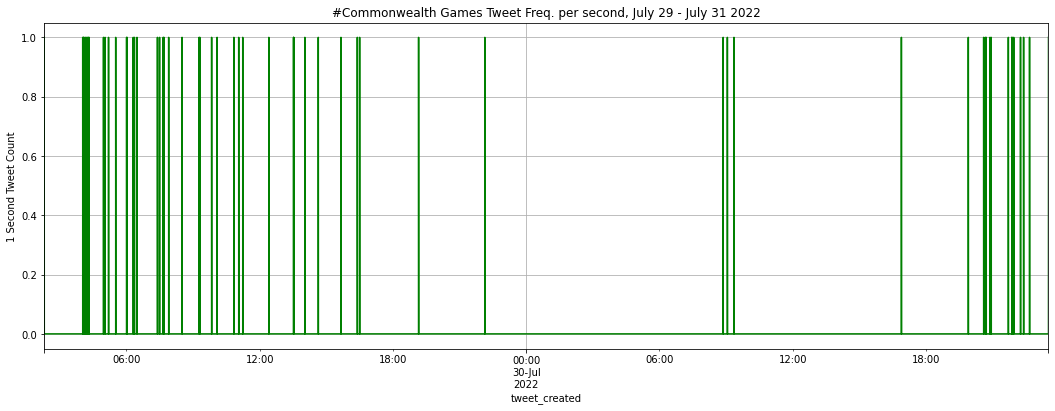

In [35]:
df_1S = df.groupby(pd.Grouper(key='tweet_created', freq='1S', convention='start')).size()
df_1S.plot(figsize=(18,6))
plt.ylabel('1 Second Tweet Count')
plt.gca().get_lines()[0].set_color("green")
plt.title('#Commonwealth Games Tweet Freq. per second, July 29 - July 31 2022')
plt.grid(True)

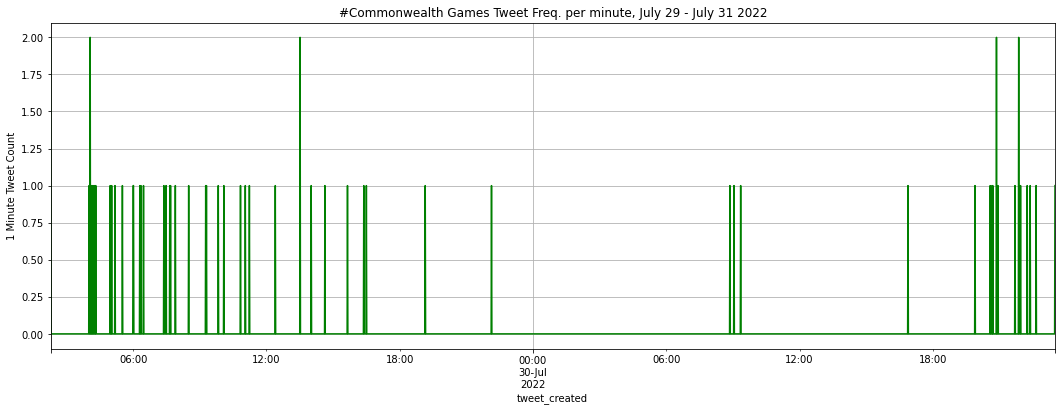

In [36]:
df_1min = df.groupby(pd.Grouper(key='tweet_created', freq='1Min', convention='start')).size()
df_1min.plot(figsize=(18,6))
plt.ylabel('1 Minute Tweet Count')
plt.gca().get_lines()[0].set_color("green")
plt.title('#Commonwealth Games Tweet Freq. per minute, July 29 - July 31 2022')
plt.grid(True)

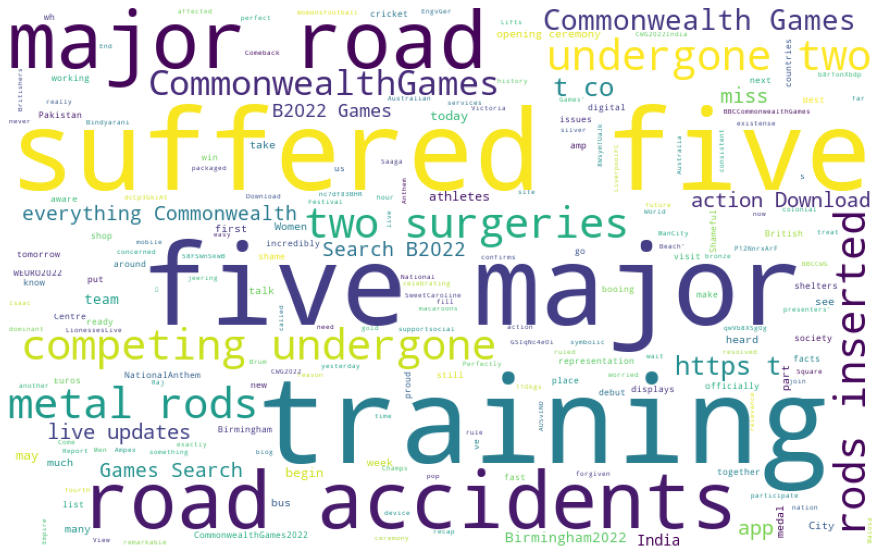

In [30]:
all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [55]:
from google.colab import files
from PIL import Image

uploaded = files.upload()

Saving bee.PNG to bee.PNG


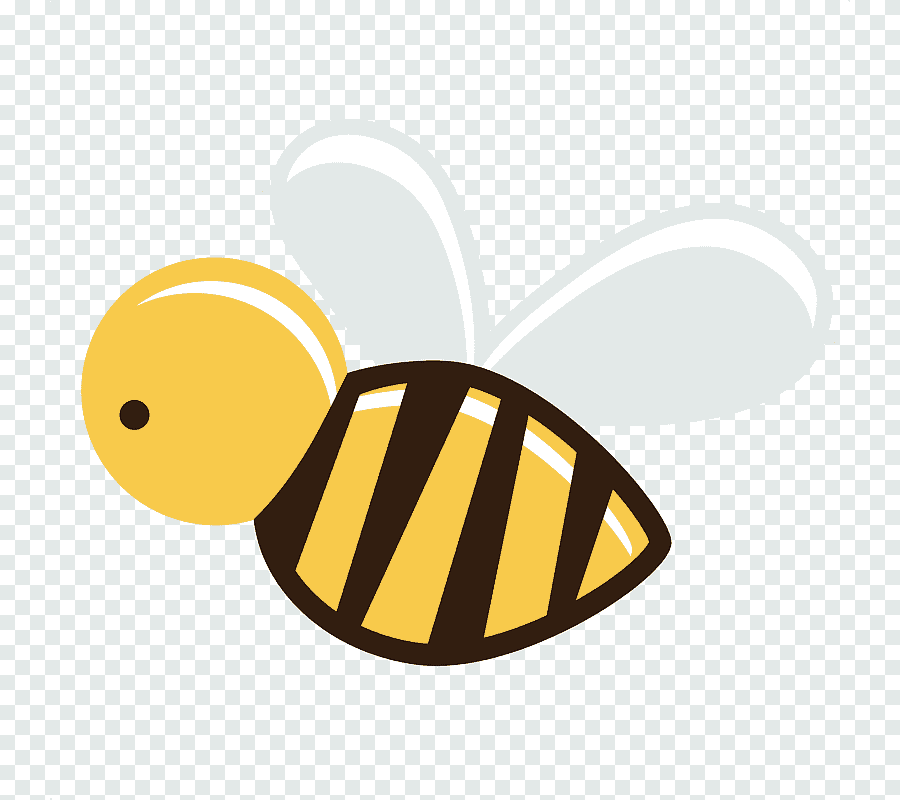

In [66]:
from IPython.display import Image
Image("bee.PNG")

In [79]:
#checked image array https://www.datacamp.com/tutorial/wordcloud-python
bee_mask = np.array(Image("bee.PNG"))
bee_mask

array(<IPython.core.display.Image object>, dtype=object)

In [84]:
import numpy
import PIL

img = PIL.Image.open("bee.PNG").convert("L")
imgarr = numpy.array(img) 

In [88]:
#converted image to array https://stackoverflow.com/questions/384759/how-do-i-convert-a-pil-image-into-a-numpy-array
imgarr

array([[255, 255, 255, ..., 231, 231, 231],
       [255, 255, 255, ..., 231, 231, 231],
       [255, 255, 255, ..., 231, 231, 231],
       ...,
       [231, 231, 231, ..., 255, 255, 255],
       [231, 231, 231, ..., 255, 255, 255],
       [231, 231, 231, ..., 255, 255, 255]], dtype=uint8)

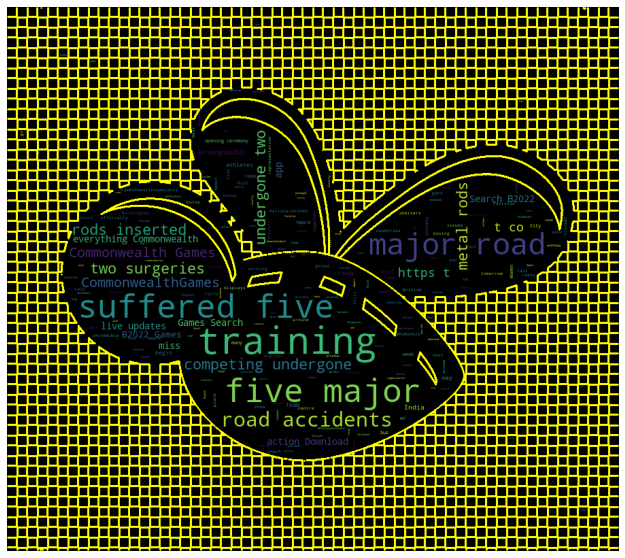

In [102]:
all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
mask = np.array(Image('bee.PNG'))
wordcloud = WordCloud(background_color='black', mask=imgarr, contour_width=3, contour_color='yellow').generate(all_words)


plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()